
# Project: Investigate a Dataset - IMDB MOVIES

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> In this project we are going to analyse a data set contains information about 10,000 movies collected from The Movie Database (TMDb), and we are going to focus specifically on the properties that affects the revenue.


### Question(s) for Analysis
>In this project we are trying to find a answer for the question :What are the properties taht affect more the revenue of the movies ?

In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set()

In [12]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.3MB/s eta 0:00:01 0% |▏                               | 40kB 4.4MB/s eta 0:00:03    8% |██▋                             | 870kB 22.5MB/s eta 0:00:01    33% |██████████▉                     | 3.5MB 28.6MB/s eta 0:00:01    60% |███████████████████▍            | 6.3MB 29.9MB/s eta 0:00:01    86% |███████████████████████████▊    | 9.1MB 28.4MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.5MB/s eta 0:00:01  0% |▎                               | 133kB 27.2MB/s eta 0:00:01    39% |████████████▊                   | 5.3MB 26.6MB/s eta 0:00:01    87% |████████████████████████████    | 11.7MB 25.9MB/s eta 0:00:01    97% |███████████████████████████████ | 13.0MB 27.2MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 

<a id='wrangling'></a>
## Data Wrangling


In [3]:
df = pd.read_csv('tmdb_movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [47]:
#let's look at the shape of the data set
df.shape

(10865, 5)

In [48]:
#let's look at some summary statistics
df.describe()

,popularity,budget,revenue,vote_average,release_year
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000
mean,0.646446,1.462429e+07,3.982690e+07,5.975012,2001.321859
std,1.000231,3.091428e+07,1.170083e+08,0.935138,12.813260
min,0.000065,0.000000e+00,0.000000e+00,1.500000,1960.000000
25%,0.207575,0.000000e+00,0.000000e+00,5.400000,1995.000000
50%,0.383831,0.000000e+00,0.000000e+00,6.000000,2006.000000
75%,0.713857,1.500000e+07,2.400000e+07,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,9.200000,2015.000000


In [49]:
#let's look at the data columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 5 columns):
popularity      10865 non-null float64
budget          10865 non-null int64
revenue         10865 non-null int64
vote_average    10865 non-null float64
release_year    10865 non-null int64
dtypes: float64(2), int64(3)
memory usage: 509.3 KB


In [50]:
# Verify if there is any duplicated columns
df.duplicated().sum()

0


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [4]:
#Drop the duplicates
df.drop_duplicates(inplace=True);

In [20]:
# Verify if the duplicates are droped ?
df.duplicated().sum()

0

In [5]:
# I will keep just the properties that wa can look at the correlation between them and the revenue.
df.drop(['id','imdb_id','runtime','director','vote_count','original_title','cast','homepage','tagline','keywords','overview','genres','production_companies','release_date','budget_adj','revenue_adj'], axis = 1, inplace = True)
df.head()

,popularity,budget,revenue,vote_average,release_year
0,32.985763,150000000,1513528810,6.5,2015
1,28.419936,150000000,378436354,7.1,2015
2,13.112507,110000000,295238201,6.3,2015
3,11.173104,200000000,2068178225,7.5,2015
4,9.335014,190000000,1506249360,7.3,2015


In [22]:
#let's look at the new shape 
df.shape

(10865, 5)

In [23]:
#let's look at the new summary statistics
df.describe()

,popularity,budget,revenue,vote_average,release_year
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000
mean,0.646446,1.462429e+07,3.982690e+07,5.975012,2001.321859
std,1.000231,3.091428e+07,1.170083e+08,0.935138,12.813260
min,0.000065,0.000000e+00,0.000000e+00,1.500000,1960.000000
25%,0.207575,0.000000e+00,0.000000e+00,5.400000,1995.000000
50%,0.383831,0.000000e+00,0.000000e+00,6.000000,2006.000000
75%,0.713857,1.500000e+07,2.400000e+07,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,9.200000,2015.000000


In [24]:
#let's look at the new data columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 5 columns):
popularity      10865 non-null float64
budget          10865 non-null int64
revenue         10865 non-null int64
vote_average    10865 non-null float64
release_year    10865 non-null int64
dtypes: float64(2), int64(3)
memory usage: 509.3 KB


<a id='eda'></a>
## Exploratory Data Analysis


### What are the properties taht affect more the revenue of the movies ?

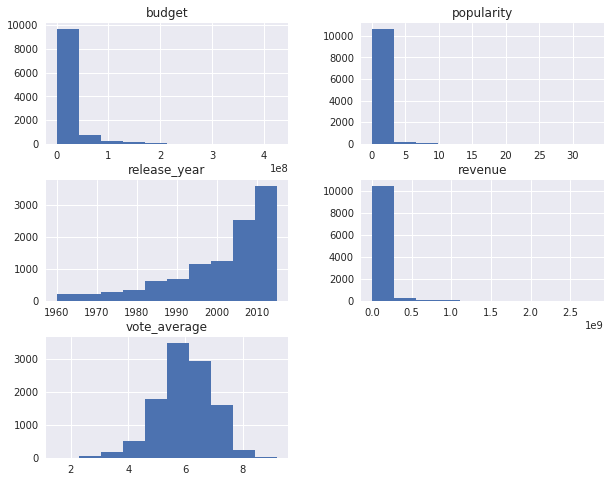

In [68]:
#Vusialize the properties
df.hist(figsize=(10,8));

We can see that every property is present cleary at a huge amount of movies 
let' see how these properties affects the revenue.

In [55]:
# A function to look at the correlation betwwen the revenue and a given propertie.
def correlation_with_revenue(propertie,color):
    plt.scatter(df[propertie],df.revenue,color = color,label='revenue')
    plt.title('Correlation between revenue and ' + propertie)
    plt.xlabel(propertie.title())
    plt.ylabel('Revenue');
    plt.legend()
    plt.show()

The correlation betwwen the revenue and the popularity

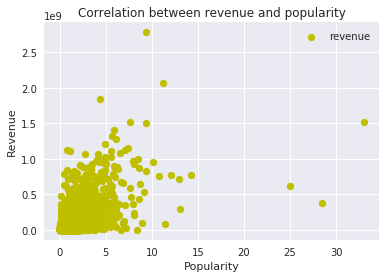

In [61]:
correlation_with_revenue('popularity','y')

We can see that the popularity had a positive effect on the revenue but the correlation is not so strong.

The correlation betwwen the revenue and the budget

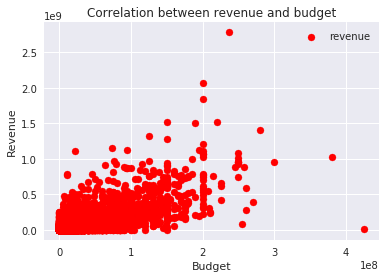

In [62]:
correlation_with_revenue('budget','r')

It's clear that the budguet had a positive effect on the revenue
" The more money you put in your film the more you get from it "

The correlation betwwen the revenue and the vote_average

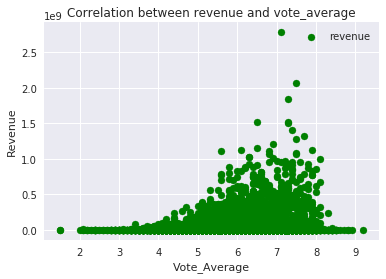

In [64]:
correlation_with_revenue('vote_average','g')

The vote average also affects positively the revenue. 

The correlation betwwen the revenue and the release_year

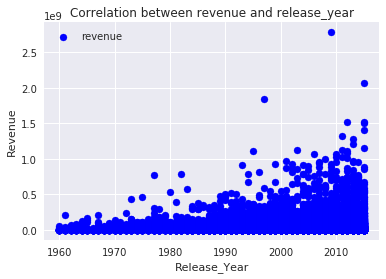

In [65]:
correlation_with_revenue('release_year','b')

It is clear that the newest movies make more money.

<a id='conclusions'></a>
## Conclusions
### Results
As a result of this analyse process we can affirm that the properties:
* Budget
* Release year
* Vote average
* Popularity

are associated with movies having high or low revenues.

### Limitations

We don not have some details aboust some properties to have 100% clear results.
for example: We don't have a proprety that tells how much of the budget has gone for publicity or if the movie is sorted in corona period an that is a critical factor for the revenue

In [59]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0